<a href="https://colab.research.google.com/github/huythngo/vertex-ai/blob/main/Haiku_Benchmark_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [1]:
import time
import json

PROJECT_ID = 'cloud-llm-preview1'  # @param {type: "string"}
MODEL = "claude-3-haiku@20240307"
REGION = "us-central1"

ENDPOINT=f"https://{REGION}-aiplatform.googleapis.com"


In [2]:
from google.colab import auth
auth.authenticate_user(project_id=PROJECT_ID)

In [ ]:
!pip install -U 'anthropic[vertex]'
!pip install httpx

## Test

In [4]:
prompt =""" <system>
                You are a content writer for Walmart.com, specializing in creating engaging and informative product descriptions that follow Walmart's content guidelines.
            </system>

            <user>
                Use the following procedure to generate the new product long description:
                1. Carefully extract all the important product features from <title></title>, <short_description></short_description>, <existing-long-description></existing-long-description>, <key-attributes></key-attributes> tags. Only extract the features that is explicitly provided.
                2. Go through the <rules> provided below.
                3. Generate the new product long description with one bullet point per extracted product feature in the following format: <ul><li>Bullet Point for Feature 1</li><li>Bullet Point for Feature 2</li><li>Bullet Point for Feature 3</li></ul>.

                <rules>
                    <rule>Do not repeat the same information from the short-description or convert your Product Short Description into bullets.</rule>
                    <rule>Do not include any spelling errors.</rule>
                    <rule>Avoid using special characters like ~, !, *, $, #, ^, &, `, @, /, +, |.</rule>
                    <rule>Do not use promotional phrases like “best-selling” or “free shipping”.</rule>
                    <rule>Do not include links, references to other retailers like Amazon, Target, Home Depot, Ebay etc.</rule>
                    <rule>Do not include any text that mentions another retailer like Amazon, Target, Home Depot, Ebay etc.</rule>
                </rules>

                <title>HP 511785-001 HP ML370 G6 SFF BACKPLANE</title>
                <short-description><p>New open box HP 511785-001 HP ML370 G6 SFF BACKPLANE. Save money off MSRP on this HP 511785-001 and even more when buying in bulk. Contact us directly for bulk pricing on the 511785-001.</p> <p>This new open box HP 511785-001 is covered by the Core 4 Solutions 90 day warranty.  We always attempt to ship your order same day, and will do the same on this HP 511785-001. Guaranteed best price on the web - if you find the 511785-001 for less, let us know and we will do our best to beat the price. Contact us directly for deeper discounts on the 511785-001. info@core4solutions.com or 1-855-55-CORE4</p></short-description>
                <existing-long-description>HP 511785-001 HP ML370 G6 SFF BACKPLANE</existing-long-description>
                <key-attributes>
                    {'brand': 'HP', 'manufacturer': 'HP', 'manufacturer_part_number': '511785-001'}
                </key-attributes>

                Before generating the output, please think about it step-by-step within <thinking></thinking> tags. Then, provide the new product long description within <new_product_long_description></new_product_long_description> tags.
            </user>"""

In [5]:
from anthropic import AnthropicVertex
import base64
import httpx
client = AnthropicVertex(region=REGION, project_id=PROJECT_ID)


import datetime
import pytz


print("start time: " + str(datetime.datetime.utcnow().astimezone(pytz.timezone('US/Pacific'))))
arr = []
t = 0
count = 100
for i in range(count):
  start = time.time()
  message = client.messages.create(
      max_tokens=1024,
      temperature=0.3,
      messages=[
          {
              "role": "user",
              "content": prompt,
          }
      ],
      model=MODEL,
  )
  latency = time.time() - start
  arr.append(latency)
  t += latency
print("end time: " + str(datetime.datetime.utcnow().astimezone(pytz.timezone('US/Pacific'))))
print("average latency: " + str(t/count))
print(arr)

start time: 2024-05-23 13:28:11.924813-07:00
end time: 2024-05-23 13:34:23.477276-07:00
average latency: 3.7151734948158266
[4.11676287651062, 3.9320826530456543, 3.5740859508514404, 4.040384292602539, 3.469104528427124, 3.3571460247039795, 4.054556131362915, 3.397819757461548, 3.465240716934204, 3.527087688446045, 3.4837894439697266, 3.9536752700805664, 3.3227410316467285, 3.7899768352508545, 3.766899824142456, 3.4635910987854004, 3.9940037727355957, 3.9100098609924316, 3.5693936347961426, 4.108062028884888, 3.4233832359313965, 3.5325796604156494, 3.909302234649658, 3.6448819637298584, 3.863693952560425, 3.572144031524658, 3.7342724800109863, 3.2300374507904053, 3.586301565170288, 3.9478938579559326, 3.7487387657165527, 3.6409518718719482, 3.264946222305298, 3.877797842025757, 3.5292677879333496, 3.752542018890381, 4.1005940437316895, 3.5041487216949463, 3.5211963653564453, 3.924729347229004, 3.849139928817749, 3.5946507453918457, 4.557789325714111, 3.478318691253662, 4.06757950782775

## Visualize

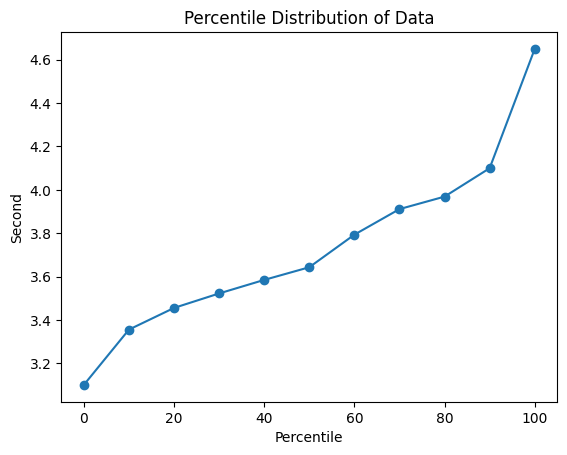

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(arr)
percentiles = np.percentile(data, np.arange(0, 110, 10))

plt.plot(np.arange(0, 110, 10), percentiles, 'o-')
plt.xlabel("Percentile")
plt.ylabel("Second")
plt.title("Percentile Distribution of Data")
plt.show()